# A sample notebook showing the main features of the python scripts

In [2]:
# import from Python Scripts

import os

from PythonScripts.Machine import Machine
from PythonScripts.ImpWake import ImpWake
from PythonScripts.Model import *

In [5]:
# input parameters

homefolder = os.getcwd()
scenariotitle = 'Sample impedance model'
scenariofolder = homefolder + 'PythonScripts/Sample_notebook/'
paramfile = 'Params/FCC-hh_injection.dat'
energy_string = '3p3TeV'

In [8]:
# Define impedance model at injection
machine = Machine(homefolder + paramfile) # define machine
impwake = ImpWake(scenariofolder, energy_string) #define impedance-wake
model = Model(machine, impwake) # define the whole impedance model

Impedance model created


In [9]:
# define a sample impedance (resistive wall)
import numpy as np
f = np.logspace(0, 14, 40 * 14 + 1)
Zlong = 1e-2 * (1+1j) * np.sqrt(f)
Zxdip = 1e10 * (1+1j) / np.sqrt(f)
Zydip = 1e10 * (1+1j) / np.sqrt(f)
model._impwake._f_z = f
model._impwake._f_x = f
model._impwake._f_y = f
model._impwake._Zlong = Zlong
model._impwake._Zxdip = Zxdip
model._impwake._Zydip = Zydip

# add a sample broadband resonator impedance
f_res = 1e9
Rw_long = 5e4
Rw_x = 1e7
Rw_y = 1e7
Q = 1
Npeak = 500
Nbroadband = 500
model._impwake.addResonatorImpedance('long', f_res, Rw_long, Q, Npeak, Nbroadband)
model._impwake.addResonatorImpedance('x', f_res, Rw_x, Q, Npeak, Nbroadband)
model._impwake.addResonatorImpedance('y', f_res, Rw_y, Q, Npeak, Nbroadband)


# append zero frequency to impedance
model._impwake.addZeroFrequencyToImpedance(['long', 'x', 'y'])

# save to file
model._impwake.saveImpedance(['long', 'x', 'y'])

Contribution is added to longitudinal impedance
Contribution is added to horizontal impedance
Contribution is added to vertical impedance
Zero frequency is added to longitudinal impedance
Zero frequency is added to horizontal impedance
Zero frequency is added to vertical impedance
('Impedance in', 'long', 'plane is saved')
('Impedance in', 'x', 'plane is saved')
('Impedance in', 'y', 'plane is saved')


In [10]:
# make pictures
model._impwake.plotImpedance(plane_scan=['long', 'x', 'y'], xscale='logarithmic', yscale='logarithmic', flimits=[1e2, 1e10], title=scenariotitle)

/usr/lib64/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Impedance figure saved
Impedance figure saved
Impedance figure saved


In [11]:
# find effective impedances for mode 0 at zero chroma
model.findEffectiveImpedanceTCBI(plane_scan=['x', 'y'], shape='gaussian')
model.findEffectiveImpedanceTMCI(plane_scan=['x', 'y'], shape='gaussian')
model.findLongEffectiveImpedance_Shaposhnikova(shape='gaussian')
model.findLongEffectiveImpedance_Ruggiero(shape='gaussian')

('Re(Zeff_TCBI) at ', '3p3TeV', ' in ', 'x', '-plane is -212.85 MOhm/m which corresponds to 389.74 turns rise time')
('Re(Zeff_TCBI) at ', '3p3TeV', ' in ', 'y', '-plane is -217.39 MOhm/m which corresponds to 374.86 turns rise time')
('Im(Zeff_TMCI) at ', '3p3TeV', ' in ', 'x', '-plane is 9.86 MOhm/m which corresponds to intensity threshold of 3.61e+11')
('Im(Zeff_TMCI) at ', '3p3TeV', ' in ', 'y', '-plane is 9.86 MOhm/m which corresponds to intensity threshold of 3.54e+11')
('Im(Zeff/n) defined by Elena Shaposhnikova (LossOfLandau) at ', '3p3TeV', ' is 39.76 mOhm')
('Im(Zeff/n) defined by Ruggiero at ', '3p3TeV', ' is 93.59 mOhm')


In [12]:
# chroma and head-tail number scans
m_scan = [0, 1]
Qp_scan = [0, 5]
plane_scan = ['x', 'y']
shape = 'gaussian'

model.coupledBunchScan(plane_scan, shape, m_scan, Qp_scan)
model.singleBunchScan(plane_scan, shape, m_scan, Qp_scan)

('Starting coupled bunch chroma scan for ', '3p3TeV', ', ', 'x', '-plane, m =', 0, ', q =', 0)
('Starting coupled bunch chroma scan for ', '3p3TeV', ', ', 'x', '-plane, m =', 1, ', q =', 1)
('Starting coupled bunch chroma scan for ', '3p3TeV', ', ', 'y', '-plane, m =', 0, ', q =', 0)
('Starting coupled bunch chroma scan for ', '3p3TeV', ', ', 'y', '-plane, m =', 1, ', q =', 1)
('Starting single-bunch chroma scan for ', '3p3TeV', ', ', 'x', '-plane, m =', 0, ', q =', 0)
('Starting single-bunch chroma scan for ', '3p3TeV', ', ', 'x', '-plane, m =', 1, ', q =', 1)
('Starting single-bunch chroma scan for ', '3p3TeV', ', ', 'y', '-plane, m =', 0, ', q =', 0)
('Starting single-bunch chroma scan for ', '3p3TeV', ', ', 'y', '-plane, m =', 1, ', q =', 1)


In [13]:
# create wake files
model._impwake.convertImpedanceToWake(plane_scan=['x','y'], AreHOMsIncluded=False, relevant_fmin=1e2, 
                                          relevant_fmax=1e10, error=0.1, n_resolved_periods=100)
model._impwake.plotWake(plane_scan=['x'], xscale='logarithmic', yscale='logarithmic', slimits=None, title = scenariotitle)
model._impwake.plotWake(plane_scan=['y'], xscale='logarithmic', yscale='logarithmic', slimits=None, title = scenariotitle)

('Calculating ', 2000, ' wake points')
('Calculating ', 2000, ' wake points')
Wake figure saved
Wake figure saved


(100.0, 10000000000.0)

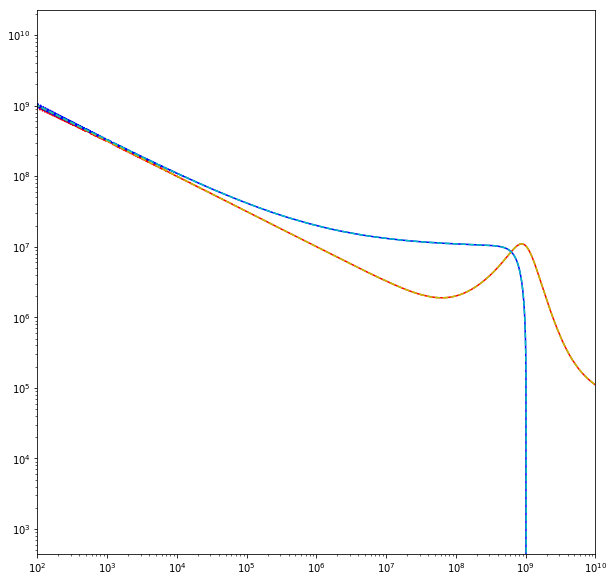

In [15]:
# check that wake files converted back to impedance match the original impedance
relevant_fmin = 1e2
relevant_fmax = 1e10
restored_f, restored_Z = model._impwake.convertWakeToImpedance('x', relevant_fmin, relevant_fmax)

from matplotlib import pyplot as plt
import numpy as np
orig_f = model._impwake._f_x
orig_Z = model._impwake._Zxdip
plt.figure(1, figsize=(10, 10))
plt.loglog(restored_f, np.real(restored_Z), '-r', restored_f, np.imag(restored_Z), '-b', orig_f, np.real(orig_Z), '--y', orig_f, np.imag(orig_Z), '--c')
plt.xlim([relevant_fmin, relevant_fmax])
